# Data Study

We run some sanity checks on the data generated to make sure it looks as expected.

In [218]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
import math
from matplotlib import pyplot as plt

from madminer.core import MadMiner
from madminer.sampling import SampleAugmenter
from madminer import sampling
from madminer.ml import ParameterizedRatioEstimator
from madminer.plotting import plot_distributions

# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)
        
sampler = SampleAugmenter('meta/delphes_data_shuffled_g02.h5')
miner = MadMiner()
miner.load('meta/setup.h5')

#Train Sample
x, theta0, theta1, y, r_xz, t_xz, n_effective = sampler.sample_train_ratio(
    theta0=sampling.benchmarks(miner.benchmarks.keys()),
    theta1=sampling.benchmark('benchmark_55'),
    n_samples=200000,
    folder='./meta/data_study',
    filename='train_ratio',
)


00:26 madminer.analysis    INFO    Loading data from meta/delphes_data_shuffled_g02.h5
00:26 madminer.analysis    INFO    Found 2 parameters
00:26 madminer.analysis    INFO    Did not find nuisance parameters
00:26 madminer.analysis    INFO    Found 121 benchmarks, of which 121 physical
00:26 madminer.analysis    INFO    Found 8 observables
00:26 madminer.analysis    INFO    Found 649198 events
00:26 madminer.analysis    INFO    Did not find morphing setup.
00:26 madminer.analysis    INFO    Did not find nuisance morphing setup
00:26 madminer.core        INFO    Found 2 parameters:
00:26 madminer.core        INFO       mzp (LHA: mass 56, maximal power in squared ME: (0,), range: (275.0, 325.0))
00:26 madminer.core        INFO       gzp (LHA: dminputs 2, maximal power in squared ME: (0,), range: (0.0, 2.0))
00:26 madminer.core        INFO    Found 121 benchmarks:
00:26 madminer.core        INFO       benchmark_0: mzp = 2.75e+02, gzp = 0.00e+00
00:26 madminer.core        INFO       bench

00:26 madminer.core        INFO       benchmark_93: mzp = 3.15e+02, gzp = 1.00
00:26 madminer.core        INFO       benchmark_94: mzp = 3.15e+02, gzp = 1.20
00:26 madminer.core        INFO       benchmark_95: mzp = 3.15e+02, gzp = 1.40
00:26 madminer.core        INFO       benchmark_96: mzp = 3.15e+02, gzp = 1.60
00:26 madminer.core        INFO       benchmark_97: mzp = 3.15e+02, gzp = 1.80
00:26 madminer.core        INFO       benchmark_98: mzp = 3.15e+02, gzp = 2.00
00:26 madminer.core        INFO       benchmark_99: mzp = 3.20e+02, gzp = 0.00e+00
00:26 madminer.core        INFO       benchmark_100: mzp = 3.20e+02, gzp = 0.20
00:26 madminer.core        INFO       benchmark_101: mzp = 3.20e+02, gzp = 0.40
00:26 madminer.core        INFO       benchmark_102: mzp = 3.20e+02, gzp = 0.60
00:26 madminer.core        INFO       benchmark_103: mzp = 3.20e+02, gzp = 0.80
00:26 madminer.core        INFO       benchmark_104: mzp = 3.20e+02, gzp = 1.00
00:26 madminer.core        INFO       bench

## Plotting $\sigma (\theta)$

In [219]:
thetas_benchmarks, xsecs_benchmarks, xsec_errors_benchmarks = sampler.cross_sections(
    theta=sampling.benchmarks(miner.benchmarks.keys())
)

00:38 madminer.sampling    INFO    Starting cross-section calculation


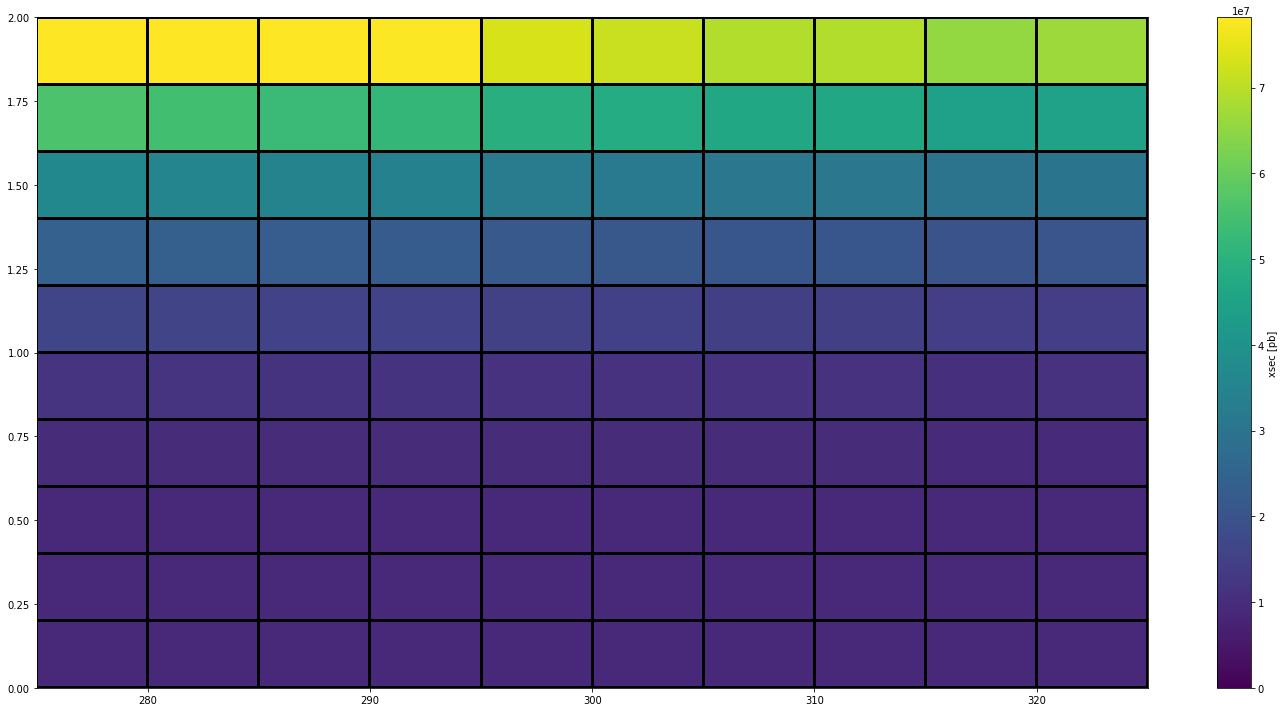

In [220]:
edges_m = np.linspace(275, 325, 11)
edges_g = np.linspace(0, 2, 11)

cmin, cmax = 0., 2.5 * np.mean(xsecs_benchmarks)

fig = plt.figure(figsize=(20,10))

#sc = plt.scatter(thetas_benchmarks[:,0], thetas_benchmarks[:,1], c=xsecs_benchmarks,
#            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
#            marker='o')

sc = plt.pcolormesh(edges_m, edges_g, xsecs_benchmarks.reshape([11,11]).T,
                    cmap='viridis', vmin=cmin, vmax=cmax, lw=2., edgecolor='black')

cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')

plt.xlim(275.,325.)
plt.ylim(0.,2.)
plt.tight_layout()
plt.show()

00:38 madminer.analysis    INFO    Loading data from meta/delphes_data_g02.h5
00:38 madminer.analysis    INFO    Found 2 parameters
00:38 madminer.analysis    INFO    Did not find nuisance parameters
00:38 madminer.analysis    INFO    Found 121 benchmarks, of which 121 physical
00:38 madminer.analysis    INFO    Found 8 observables
00:38 madminer.analysis    INFO    Found 649198 events
00:38 madminer.analysis    INFO    Did not find morphing setup.
00:38 madminer.analysis    INFO    Did not find nuisance morphing setup


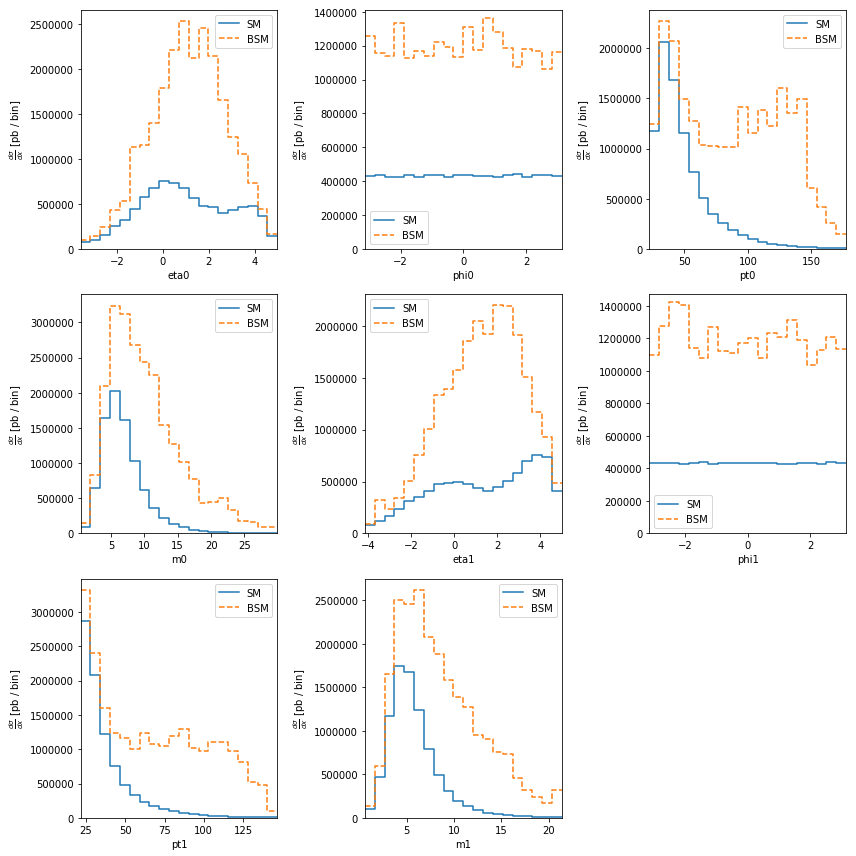

In [221]:
plotting_benchmark = 'benchmark_6'
_ = plot_distributions(
    filename='meta/delphes_data_g02.h5',
    parameter_points=['benchmark_0', plotting_benchmark],
    line_labels=['SM', 'BSM'],
    uncertainties='none',
    n_bins=20,
    n_cols=3
)

    

00:39 madminer.analysis    INFO    Loading data from meta/delphes_data_g02.h5
00:39 madminer.analysis    INFO    Found 2 parameters
00:39 madminer.analysis    INFO    Did not find nuisance parameters
00:39 madminer.analysis    INFO    Found 121 benchmarks, of which 121 physical
00:39 madminer.analysis    INFO    Found 8 observables
00:39 madminer.analysis    INFO    Found 649198 events
00:39 madminer.analysis    INFO    Did not find morphing setup.
00:39 madminer.analysis    INFO    Did not find nuisance morphing setup


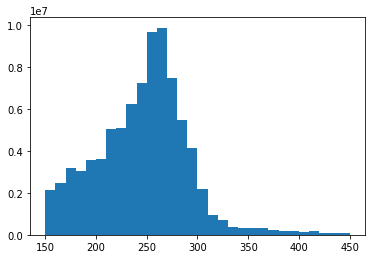

In [222]:
plotting_benchmark = 'benchmark_9'
sa = SampleAugmenter('meta/delphes_data_g02.h5', include_nuisance_parameters=True)

all_observables = list(sa.observables.keys())
observable_labels = all_observables

# Get event data (observations and weights)
all_x, all_weights_benchmarks = sa.weighted_events()

indiv_x, indiv_weights_benchmarks = [], []

# Remove negative weights
sane_event_filter = np.all(all_weights_benchmarks >= 0.0, axis=1)

n_events_before = all_weights_benchmarks.shape[0]
all_x = all_x[sane_event_filter]
all_weights_benchmarks = all_weights_benchmarks[sane_event_filter]
n_events_removed = n_events_before - all_weights_benchmarks.shape[0]

def calc_inv_mass(all_x):
    eta0 = all_x[:,0]
    phi0 = all_x[:,1]
    pt0  = all_x[:,2]
    m0   = all_x[:,3]
    eta1 = all_x[:,4]
    phi1 = all_x[:,5]
    pt1  = all_x[:,6]
    m1   = all_x[:,7]
    return  np.sqrt(2 * np.abs(pt0) * np.abs(pt1) * (np.cosh(eta0 - eta1) - np.cos(phi0-phi1)))

invariant_mass = calc_inv_mass(all_x)
epsilon = .03
weights = all_weights_benchmarks[:, int(plotting_benchmark.split('_')[1])]

plt.hist(invariant_mass, bins=30, weights=weights)
plt.show()

In [232]:
x, theta0, theta1, y, r_xz, t_xz, n_effective = sampler.sample_train_ratio(
    theta0=sampling.benchmark('benchmark_9'),
    theta1=sampling.benchmark('benchmark_0'),
    n_samples=200000,
    folder='./meta/data_study',
    filename='train_ratio',
)

00:54 madminer.sampling    INFO    Extracting training sample for ratio-based methods. Numerator hypothesis: benchmark_9, denominator hypothesis: benchmark_0
00:54 root                 WARNING No morphing setup loaded. Cannot calculate joint score.
00:54 madminer.sampling    INFO    Starting sampling serially
00:54 madminer.sampling    INFO    Sampling from parameter point 1 / 1
00:54 madminer.sampling    INFO    Effective number of samples: 64.69327320569639
00:54 madminer.sampling    INFO    Starting sampling serially
00:54 madminer.sampling    INFO    Sampling from parameter point 1 / 1
00:54 madminer.sampling    INFO    Effective number of samples: 27757.287974061444


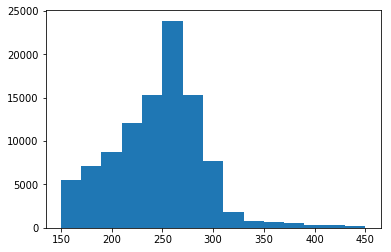

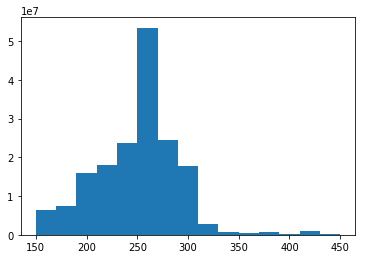

0.0
(0,)
0


In [234]:
# y=0 - theta0,                 y=1 - theta1

plt.hist(calc_inv_mass(x)[y[:,0]==0], bins=15)
plt.show()
plt.hist(calc_inv_mass(x)[y[:,0]==0], bins=15, weights= r_xz[y[:,0]==0])
plt.show()

print( 1 - np.count_nonzero(all_weights_benchmarks[:,10]) / all_weights_benchmarks[:,10].shape[0])
# Where r(x,z|theta0, theta1)=infinity for x~p(x|theta0) ((that is, p(x|theta1) = 0)
print(np.where(np.isinf(r_xz[y[:,0]==0]))[0].shape)
# Where r(x,z|theta0, theta1)=0 for x~p(x|theta1), (or p(x|theta0)=0)
print(r_xz[y[:,0]==1].shape[0] - np.count_nonzero(r_xz[y[:,0]==1]))